# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'Université de Lorraine</span>

Une fois que l'on dispose de sa liste de DOI nettoyée (voir le notebook "nettoyage_donnees"), il est à présent temps d'appliquer le code du Baromètre national de la Science Ouverte aux données de son propre établissement. Il suffit de remplacer "lorraine" par le nom de son établissement à l'intérieur du code.

## <span style="color:orange">Importer les scripts</span>

Adresse :  https://github.com/MinistereSupRecherche/bso

Copier dans son propre répertoire, à la racine, les fichiers "scanr_utils.py" et "unpwaywall_utils.py". Ce n'est pas une faute de frappe, le fichier s'appelle bien "unpwaywall".

In [1]:
from scanr_utils import *
from unpwaywall_utils import *

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

In [2]:
with open("Data/outputs/doi_lorraine") as f:
    doi_lorraine_str = f.read()

In [3]:
doi_lorraine_df = pd.read_csv("Data/outputs/doi_lorraine",sep="\t")

In [4]:
doi_lorraine_df

doi
0       10.1016/j.chemgeo.2016.10.031
1           10.1186/s13601-016-0137-4
2        10.1371/journal.pone.0168349
3      10.1016/j.jpowsour.2016.10.037
4      10.1016/j.jpowsour.2016.10.035
...                               ...
15751       10.1002/9781119427896.ch8
15752       10.1107/s1600576719014055
15753      10.1007/s00220-019-03431-6
15754         10.1111/1365-2478.12904
15755       10.1163/24689300-05201007

[15756 rows x 1 columns]

## <span style="color:orange">Enrichissement avec l'API Unpaywall</span>

On ajoute à la liste de DOI constituée précédemment toutes les informations comprises dans l'API Unpaywall : titre, année, statut d'open access... <span style="color:red">**Attention, le processus peut prendre plusieurs heures la première fois que l'on exécute ce code.**</span>

In [ ]:
publis_lorraine_oa_status = enrich_with_upw_status(doi_lorraine_df)
publis_lorraine_oa_status
publis_lorraine_oa_status.to_csv("Data/outputs/publis_lorraine_oa_status",index=False)

Capturer le résultat pour ne pas avoir à refaire ce travail plusieurs fois :

In [5]:
publis_lorraine_oa_status = pd.read_csv("Data/outputs/publis_lorraine_oa_status")

## <span style="color:orange">Ajouter à la DataFrame le champ "scientific field" pour ajouter le domaine pour chaque DOI grâce au jeu de données du Baromètre</soan>

Le jeu de données est disponible à cette adresse : https://data.enseignementsup-recherche.gouv.fr/explore/dataset/open-access-monitor-france/export/?disjunctive.oa_host_type&disjunctive.year

<span style="color:red">**Il faut le télécharger chaque année et le placer au même endroit (Barometre_SO_lorraine -> raw) pour mettre à jour les données.**</span>

### Lire le jeu de données du Baromètre national et le stocker dans une variable

In [6]:
with open("Data/raw/open-access-monitor-france.csv", encoding='utf-8') as f:
    open_access_monitor_france_str = f.read()

In [7]:
open_access_monitor_france_df = pd.read_csv("Data/raw/open-access-monitor-france.csv", encoding='utf-8',sep=";")

### Fusionner la DataFrame Lorraine et le jeu de données du Baromètre sur le critère du DOI pour ajouter le champ "scientific field"

In [8]:
df_complete = pd.merge(publis_lorraine_oa_status, open_access_monitor_france_df[['doi', 'scientific_field']], how="left", on="doi")
df_complete['scientific_field'].fillna('unknown', inplace = True)

In [9]:
df_complete

doi               oa_type  is_oa  \
0       10.1016/j.chemgeo.2016.10.031                closed  False   
1           10.1186/s13601-016-0137-4  publisher;repository   True   
2        10.1371/journal.pone.0168349  publisher;repository   True   
3      10.1016/j.jpowsour.2016.10.037                closed  False   
4      10.1016/j.jpowsour.2016.10.035                closed  False   
...                               ...                   ...    ...   
15751       10.1002/9781119427896.ch8                closed  False   
15752       10.1107/s1600576719014055  publisher;repository   True   
15753      10.1007/s00220-019-03431-6            repository   True   
15754         10.1111/1365-2478.12904             publisher   True   
15755       10.1163/24689300-05201007                closed  False   

                                                   title published_date  \
0      Zinc isotope fractionation during adsorption t...     2016-12-01   
1      ARIA 2016: Care pathways implementing emerging...     2016-12-01   
2      Prediction of Left Ventricular Remodeling afte...     2016-12-30   
3      A critical review on gas diffusion micro and m...     2016-12-01   
4      Decohesion and rupture mechanisms of a multila...     2016-12-01   
...                                                  ...            ...   
15751                       Polyphenols from Plant Roots     2019-01-11   
15752  Fat Chance! Probability from 0 to 1. By Benedi...     2019-11-08   
15753  Conformally Covariant Bi-differential Operator...     2019-04-27   
15754  Effective utilization of seismic reflection te...     2019-12-30   
15755  L’idée D’Université à L’heure des Démocraties ...     2019-11-15   

       published_year            genre journal_is_in_doaj  \
0              2016.0  journal-article              False   
1              2016.0  journal-article               True   
2              2016.0  journal-article               True   
3              2016.0  journal-article              False   
4              2016.0  journal-article              False   
...               ...              ...                ...   
15751          2019.0     book-chapter              False   
15752          2019.0  journal-article              False   
15753          2019.0  journal-article              False   
15754          2019.0  journal-article              False   
15755          2019.0  journal-article              False   

             journal_issns                            journal_name  \
0                0009-2541                        Chemical Geology   
1                2045-7022      Clinical and Translational Allergy   
2                1932-6203                                PLOS ONE   
3                0378-7753                Journal of Power Sources   
4                0378-7753                Journal of Power Sources   
...                    ...                                     ...   
15751                  NaN  Recent Advances in Polyphenol Research   
15752            1600-5767      Journal of Applied Crystallography   
15753  0010-3616,1432-0916  Communications in Mathematical Physics   
15754  0016-8025,1365-2478                 Geophysical Prospecting   
15755  0070-2749,2468-9300           Danish Yearbook of Philosophy   

                                           publisher  \
0                                        Elsevier BV   
1            Springer Science and Business Media LLC   
2                   Public Library of Science (PLoS)   
3                                        Elsevier BV   
4                                        Elsevier BV   
...                                              ...   
15751                         John Wiley & Sons, Ltd   
15752  International Union of Crystallography (IUCr)   
15753        Springer Science and Business Media LLC   
15754                                          Wiley   
15755                                          Brill   

                   scientific_field  
0      

Les publications de l'Université de Lorraine ont été enrichies par l'ajout du champ "scientific field" produit par le Ministère. En revanche, les données lorraines couvrent la période 2016-2019, alors que le Baromètre s'arrête en 2018 : l'information du domaine disciplinaire sera donc absente pour l'année 2019. 

In [10]:
df_complete.to_csv("Data/outputs/publis_lorraine_completes",index=False)

<span style="color:green">**La liste de DOI enrichie par les informations présentes dans l'API Unpaywall et par le code du Ministère permettant de connaître la discipline a été stockée sous forme de fichier CSV dans le dossier Data > outputs.**</span>

## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

### Importer les libraires nécessaires

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### *Proportion des publications 2018 en accès ouvert (mesuré en 2020)*

Il faut commencer par déterminer les données qui vont être utilisées pour réaliser le graphique : compter le nombre de publications parues en 2018 et les isoler dans la variable "pie_data". **Bien que ce calcul soit réalisé en 2020, il est plus pertinent d'utiliser les données 2018 que les données 2019 pour ce graphique. En effet, les délais d'embargos pouvant monter jusqu'à 12 mois ne permettent pas de juger en 2020 la réelle ouverture des publications de l'année précédente**.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title.**</span>

Isoler l'année 2018 :

In [12]:
pie_data = df_complete.loc[df_complete['published_year'] == 2018.0,:]

Définir les deux niveaux dans le graphique : accès ouvert ou non (variable "oa_yes_no"), type d'accès ouvert (variable "type_oa") :

In [13]:
oa_yes_no = pie_data['is_oa'].value_counts().sort_index()
oa_yes_no = oa_yes_no.rename({False: 'Accès fermé global', True: 'Accès ouvert global'})
oa_yes_no

Accès fermé global     1805
Accès ouvert global    2002
Name: is_oa, dtype: int64

In [14]:
type_oa = pie_data['oa_type'].value_counts().sort_index()
type_oa = type_oa.rename({'closed': 'Accès fermé', 'publisher' : "Editeur", 'publisher;repository' : 'Editeur & Archive ouverte', 
                         'repository' : 'Archive ouverte'})
type_oa

Accès fermé                  1805
Editeur                       410
Editeur & Archive ouverte     719
Archive ouverte               873
Name: oa_type, dtype: int64

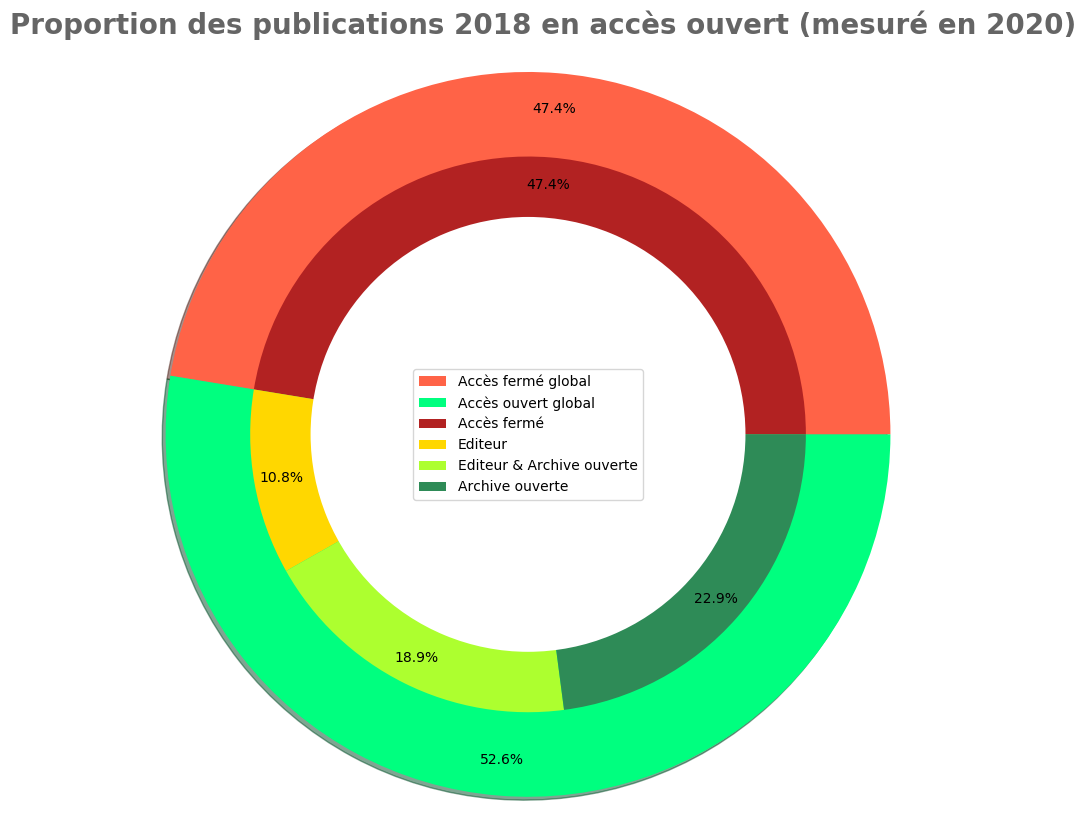

In [15]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.pie(oa_yes_no, labels=oa_yes_no.index, radius=3, labeldistance = None, colors=['tomato', 'springgreen'], autopct=lambda x: str(round(x, 1)) + '%', pctdistance = 0.9, shadow = True);
ax.pie(type_oa, labels=type_oa.index, radius=2.3, labeldistance = None, colors=['firebrick','gold','greenyellow','seagreen'], autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9);
ax.pie([1], radius=1.8, colors='white');
ax.legend(loc="center")
plt.title('Proportion des publications 2018 en accès ouvert (mesuré en 2020)', fontsize = 20, x = 0.55, y = 1.8,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/proportion_publications_oa.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Evolution du taux d'accès ouvert aux publications 2016-2019*

**Isoler les publications des années souhaitées**

Quelques publications d'autres années peuvent se glisser, si l'année est mal renseignée dans les bases de données. Il vaut mieux donc s'assurer que les bonnes années sont utilisées. <span style="color:red">**Pour mettre à jour ce graphique, il faut ajouter la nouvelle année et changer le nom de la variable. df_complete_20162019 devient par exemple df_complete20162020. Attention, il faudra penser à changer le nom de cette variable dans le reste du code.**</span>

In [16]:
df_complete_20162019 = df_complete.loc[(df_complete['published_year'] == 2016.0) | (df_complete['published_year'] == 2017.0) 
                                       | (df_complete['published_year'] == 2018.0) | (df_complete['published_year'] == 2019.0),:]


# Ignorer l'avertissement
pd.set_option('mode.chained_assignment', None)
df_complete_20162019.is_oa = df_complete_20162019.is_oa.astype(bool)

**Préparer les données pour chaque type d'accès ouvert**

Les différents types d'accès ouvert sont : 
- "Editeur" : publication en accès ouvert chez un éditeur uniquement
- "Editeur et Archive ouverte" : publication à la fois en accès ouvert chez un éditeur et en dépôt dans une archive ouverte
- "Archive ouverte" : publication en accès ouvert uniquement dans une archive ouverte

In [17]:
df_complete_20162019['oa_publisher_repository'] = df_complete_20162019.oa_type=='publisher;repository'
df_complete_20162019['oa_repository'] = df_complete_20162019.oa_type=='repository'
df_complete_20162019['oa_publisher'] = df_complete_20162019.oa_type=='publisher'
df_complete_20162019['oa_unk'] = df_complete_20162019.oa_type=='unknown'

**Définition du taux d'accès ouvert global par année**

In [18]:
df_oa_global_year = pd.DataFrame(df_complete_20162019.groupby(['published_year'])[['is_oa', 'oa_repository', 
                                                                                   'oa_publisher', 'oa_unk', 
                                                                                   'oa_publisher_repository']]
                                 .agg(['count', np.mean])).reset_index()
df_oa_global_year.columns = ['published_year', 'nb_doi', 'oa_mean', 'nbdoi1', 'oa_repository_mean', 'nb_doi2', 
                             'oa_publisher_mean', 'nb_doi3', 'oa_unk_mean', 'nb_doi4', 'oa_publisher_repository_mean']
df_oa_global_year['year_label'] = df_oa_global_year.apply(lambda x:"{}\n({} publications)".format(int(x.published_year), int(x.nb_doi)), 
                                                          axis=1)
df_oa_global_year = df_oa_global_year.sort_values(by='published_year', ascending=True)


**Réalisation du graphique**

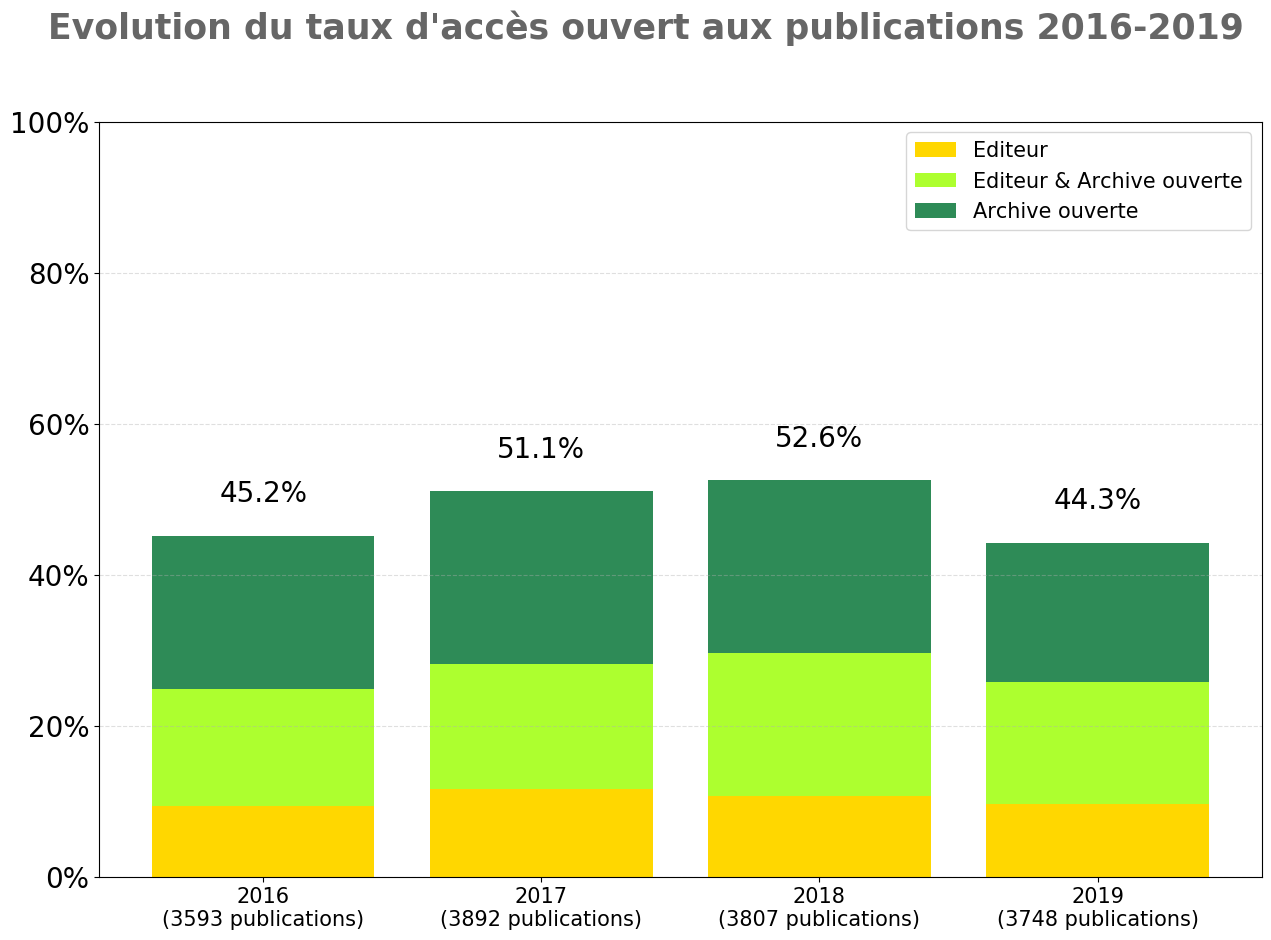

In [19]:
graph_type = 'poster'

if graph_type == 'poster':
    fig, (ax) = plt.subplots(figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
else:
    fig, (ax) = plt.subplots(figsize=(10, 12), dpi=100, facecolor='w', edgecolor='k')


years = df_oa_global_year.year_label.tolist()
y_pos = np.arange(len(years))

oa_publisher_repository_mean = df_oa_global_year.oa_publisher_repository_mean.tolist() 
oa_repository_mean = df_oa_global_year.oa_repository_mean.tolist() 
oa_publisher_mean = df_oa_global_year.oa_publisher_mean.tolist() 
oa_unk_mean = df_oa_global_year.oa_unk_mean.tolist()

from operator import add
oa_total_mean = list( map(add, oa_publisher_repository_mean, oa_repository_mean))
oa_total_mean = list( map(add, oa_total_mean, oa_publisher_mean)  )
oa_total_mean = list( map(add, oa_total_mean, oa_unk_mean)  )     


rect1 = ax.bar(y_pos, oa_publisher_mean, align='center', alpha = 1.0, color='gold',
        ecolor='black', label="Editeur")

ax.bar(y_pos, oa_publisher_repository_mean, align='center', alpha = 1.0, color='greenyellow',
        bottom = oa_publisher_mean,
        ecolor='black', label="Editeur & Archive ouverte")

ax.bar(y_pos, oa_repository_mean, align='center',alpha = 1.0, color='seagreen',
       bottom = [oa_publisher_mean[i] + oa_publisher_repository_mean[i] for i in range(0, len(oa_publisher_mean))], 
         ecolor='black', label="Archive ouverte")


w = rect1[0].get_width()
for year_ix in range(0, 4):
    ax.annotate("{:,.1%}".format(oa_total_mean[year_ix]),
                        xy=(year_ix , oa_total_mean[year_ix]),
                        xytext=(0, 20),  
                        size=20,
                        textcoords="offset points",
                        ha='center', va='bottom')

ax.set_xticks(y_pos)
ax.set_xticklabels(years, fontsize = 15)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylim([0,1])
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()], fontsize = 20)
ax.legend(fontsize=15)
ax.yaxis.grid(ls='--', alpha=0.4)

# Ignorer l'avertissement
pd.set_option('mode.chained_assignment', None)

plt.title("Evolution du taux d'accès ouvert aux publications 2016-2019", fontsize = 25, x = 0.47, y = 1.1,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/evolution_oa_annees.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Taux d'accès ouvert aux publications 2018 par discipline (calculé en 2020)*

Les données du Baromètre n'étant pas encore mise à jour, le taux par discipline pour 2019 ne peut pas encore être visualisé.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title. Attention, il faudra mettre la nouvelle année à jour partout dans le code.**</span>

**Isoler les publications de l'année 2018**

In [20]:
publications_2018 = df_complete.loc[df_complete['published_year'] == 2018.0,:]

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par discipline dans l'année ?**

In [21]:
df_oa_discipline_global = pd.crosstab([publications_2018['scientific_field']],publications_2018['oa_type'])
df_oa_discipline_global

oa_type                                       closed  publisher  \
scientific_field                                                  
Biology (fond.)                                  166         47   
Chemistry                                        215         11   
Computer and \n information sciences             168         35   
Earth, Ecology, \nEnergy and applied biology     207         31   
Engineering                                      126         11   
Humanities                                        35         20   
Mathematics                                       38         18   
Medical research                                 422        144   
Physical sciences, Astronomy                     276         43   
Social sciences                                   53         25   
unknown                                           99         25   

oa_type                                       publisher;repository  repository  
scientific_field                                                                
Biology (fond.)                                                184          76  
Chemistry                                                       31          50  
Computer and \n information sciences                            46         160  
Earth, Ecology, \nEnergy and applied biology                    64          97  
Engineering                                                     23          51  
Humanities                                                      17           7  
Mathematics                                                     28          89  
Medical research                                               181          86  
Physical sciences, Astronomy                                    87         186  
Social sciences                                                 15          17  
unknown                                                         43          54

**Convertir le résultat en pourcentages**

In [22]:
df_oa_discipline = pd.crosstab([publications_2018['scientific_field']],publications_2018['oa_type'])
df_oa_discipline = (df_oa_discipline.T / df_oa_discipline.T.sum()).mul(100).round(1)
df_oa_discipline = df_oa_discipline.T
df_oa_discipline

oa_type                                       closed  publisher  \
scientific_field                                                  
Biology (fond.)                                 35.1        9.9   
Chemistry                                       70.0        3.6   
Computer and \n information sciences            41.1        8.6   
Earth, Ecology, \nEnergy and applied biology    51.9        7.8   
Engineering                                     59.7        5.2   
Humanities                                      44.3       25.3   
Mathematics                                     22.0       10.4   
Medical research                                50.7       17.3   
Physical sciences, Astronomy                    46.6        7.3   
Social sciences                                 48.2       22.7   
unknown                                         44.8       11.3   

oa_type                                       publisher;repository  repository  
scientific_field                                                                
Biology (fond.)                                               38.9        16.1  
Chemistry                                                     10.1        16.3  
Computer and \n information sciences                          11.2        39.1  
Earth, Ecology, \nEnergy and applied biology                  16.0        24.3  
Engineering                                                   10.9        24.2  
Humanities                                                    21.5         8.9  
Mathematics                                                   16.2        51.4  
Medical research                                              21.7        10.3  
Physical sciences, Astronomy                                  14.7        31.4  
Social sciences                                               13.6        15.5  
unknown                                                       19.5        24.4

**Générer le graphique**

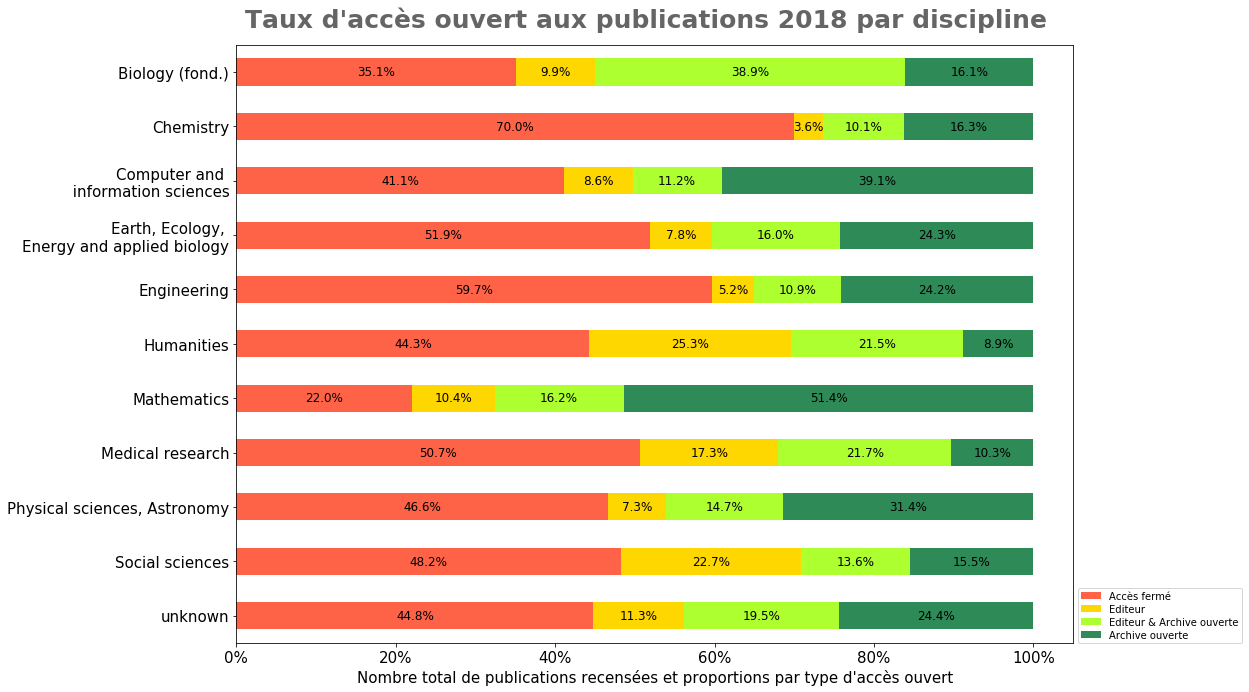

In [23]:
import matplotlib.ticker as mtick

ax = df_oa_discipline.plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','gold','greenyellow','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_discipline.columns:
    for i in df_oa_discipline.index:
        label = str(df_oa_discipline.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=12)

# Trier les disciplines par ordre alphabétique
plt.gca().invert_yaxis()
plt.tick_params(axis = 'both', labelsize = 15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 15)

plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2018 par discipline", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_discipline.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Taux d'accès ouvert aux publications 2019 par éditeur / préfixe DOI (calculé en 2020)*

Le Baromètre du Mnistère montre le taux d'accès ouvert aux publications par éditeur, ce qui a du sens au niveau national. Mais au niveau local, il semble plus judicieux de regarder auprès de quels éditeurs publient en majorité les chercheurs, puis de regarder ces éditeurs de plus près.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title. Attention, il faudra mettre la nouvelle année à jour partout dans le code.**</span>

**Isoler les publications de l'année 2018**

In [24]:
publications_2018 = df_complete.loc[df_complete['published_year'] == 2018.0,:]

**Voir quels sont les 20 éditeurs majoritaires au sein de la production de l'Université de Lorraine**

In [25]:
publications_2018['publisher'].value_counts().iloc[0:20]

Elsevier BV                                                 1132
Springer Science and Business Media LLC                      422
Wiley                                                        245
Springer International Publishing                            167
IEEE                                                         144
IOP Publishing                                               109
MDPI AG                                                      106
American Chemical Society (ACS)                              105
Oxford University Press (OUP)                                104
Informa UK Limited                                            99
AIP Publishing                                                56
Institute of Electrical and Electronics Engineers (IEEE)      54
Ovid Technologies (Wolters Kluwer Health)                     48
EDP Sciences                                                  47
Royal Society of Chemistry (RSC)                              46
CAIRN                    

On remarque ici qu'il y a parfois des doublons : par exemple, IEEE apparaît une fois sous la forme "IEEE", une fois sous la forme "Institute of Electrical and Electronics Engineers (IEEE). Ce doublon provient de l'API Unpaywall et ne peut donc être corrigé ici. En comparant les taux d'accès ouvert de ces deux "éditeurs" (qui est en réalité le même), on peut voir qu'ils sont très proches. Il n'est donc pas nécessaire de le reprendre dans la liste ci-dessous, au risque de provoquer de la confusion. "Springer Science and Business Media LLC" n'est en revanche pas un doublon de "Springer International Publishing".

**Choisir les éditeurs voulus**

Un graphique présentant le taux d'accès ouvert pour chaque éditeur deviendrait illisible. Pour l'Université de Lorraine par exemple, près de 250 éditeurs sont concernés. Seuls les 20 éditeurs ou les plateformes les plus représentés au sein des publications 2018 sont donc repris ici ; mais si l'on s'intéresse à d'autres éditeurs, il suffit de modifier ou d'ajouter leur nom dans le code ci-dessous.

In [26]:
editeurs_2018 = publications_2018.loc[(publications_2018['publisher'] == "Elsevier BV") |
                                       (publications_2018['publisher'] == "Springer Science and Business Media LLC") | 
                                      (publications_2018['publisher'] == "Wiley") | 
                                      (publications_2018['publisher'] == "Springer International Publishing") | 
                                      (publications_2018['publisher'] == "IEEE") | 
                                      (publications_2018['publisher'] == "IOP Publishing") | 
                                      (publications_2018['publisher'] == "MDPI AG") | 
                                      (publications_2018['publisher'] == "American Chemical Society (ACS)") | 
                                      (publications_2018['publisher'] == "Oxford University Press (OUP)") |
                                      (publications_2018['publisher'] == "Informa UK Limited") |
                                      (publications_2018['publisher'] == "AIP Publishing") |
                                      (publications_2018['publisher'] == "Ovid Technologies (Wolters Kluwer Health)") | 
                                      (publications_2018['publisher'] == "EDP Sciences") | 
                                      (publications_2018['publisher'] == "Royal Society of Chemistry (RSC)") | 
                                      (publications_2018['publisher'] == "CAIRN") | 
                                      (publications_2018['publisher'] == "Frontiers Media SA") | 
                                      (publications_2018['publisher'] == "American Physical Society (APS)") | 
                                      (publications_2018['publisher'] == "OpenEdition") | 
                                      (publications_2018['publisher'] == "International Union of Crystallography (IUCr)") ,:]

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par éditeur dans l'année ?**

In [27]:
df_oa_editeur_global = pd.crosstab([editeurs_2018['publisher']],editeurs_2018['oa_type'])
df_oa_editeur_global.sort_values(by='closed', ascending=False)

oa_type                                        closed  publisher  \
publisher                                                          
Elsevier BV                                       718         94   
Springer Science and Business Media LLC           191         25   
Wiley                                             110         49   
Springer International Publishing                 104          3   
IEEE                                               86          0   
American Chemical Society (ACS)                    72          1   
Informa UK Limited                                 62          3   
IOP Publishing                                     34         11   
Royal Society of Chemistry (RSC)                   32          1   
CAIRN                                              31          3   
Ovid Technologies (Wolters Kluwer Health)          30          5   
Oxford University Press (OUP)                      23         40   
AIP Publishing                                     23          5   
American Physical Society (APS)                    11          0   
EDP Sciences                                       10          3   
OpenEdition                                         7         25   
International Union of Crystallography (IUCr)       1         19   
Frontiers Media SA                                  0          0   
MDPI AG                                             0         11   

oa_type                                        publisher;repository  \
publisher                                                             
Elsevier BV                                                      80   
Springer Science and Business Media LLC                         109   
Wiley                                                            41   
Springer International Publishing                                 4   
IEEE                                                              0   
American Chemical Society (ACS)                                   5   
Informa UK Limited                                               14   
IOP Publishing                                                   13   
Royal Society of Chemistry (RSC)                                  5   
CAIRN                                                             1   
Ovid Technologies (Wolters Kluwer Health)                         4   
Oxford University Press (OUP)                                    28   
AIP Publishing                                                    1   
American Physical Society (APS)                                   8   
EDP Sciences                                                     27   
OpenEdition                                                      10   
International Union of Crystallography (IUCr)                    11   
Frontiers Media SA                                               43   
MDPI AG                                                          95   

oa_type                                        repository  
publisher                                                  
Elsevier BV                                           240  
Springer Science and Business Media LLC                97  
Wiley                                                  45  
Springer International Publishing                      56  
IEEE                                                   58  
American Chemical Society (ACS)                        27  
Informa UK Limited                                     20  
IOP Publishing                                         51  
Royal Society of Chemistry (RSC)                        8  
CAIRN                                                   9  
Ovid Technologies (Wolters Kluwer Health)               9  
Oxford University Press (OUP)                          13  
AIP Publishing                                         27  
American Physical Society (APS)                        24  
EDP Sciences                                            7  
OpenEdition                                             1  

**Convertir le résultat en pourcentages**

In [28]:
df_oa_editeur = pd.crosstab([editeurs_2018['publisher']],editeurs_2018['oa_type'])
df_oa_editeur = (df_oa_editeur.T / df_oa_editeur.T.sum()).mul(100).round(1)
df_oa_editeur = df_oa_editeur.T
df_oa_editeur = df_oa_editeur.sort_values(by='closed', ascending=False)
df_oa_editeur

oa_type                                        closed  publisher  \
publisher                                                          
CAIRN                                            70.5        6.8   
Royal Society of Chemistry (RSC)                 69.6        2.2   
American Chemical Society (ACS)                  68.6        1.0   
Elsevier BV                                      63.4        8.3   
Informa UK Limited                               62.6        3.0   
Ovid Technologies (Wolters Kluwer Health)        62.5       10.4   
Springer International Publishing                62.3        1.8   
IEEE                                             59.7        0.0   
Springer Science and Business Media LLC          45.3        5.9   
Wiley                                            44.9       20.0   
AIP Publishing                                   41.1        8.9   
IOP Publishing                                   31.2       10.1   
American Physical Society (APS)                  25.6        0.0   
Oxford University Press (OUP)                    22.1       38.5   
EDP Sciences                                     21.3        6.4   
OpenEdition                                      16.3       58.1   
International Union of Crystallography (IUCr)     2.9       55.9   
MDPI AG                                           0.0       10.4   
Frontiers Media SA                                0.0        0.0   

oa_type                                        publisher;repository  \
publisher                                                             
CAIRN                                                           2.3   
Royal Society of Chemistry (RSC)                               10.9   
American Chemical Society (ACS)                                 4.8   
Elsevier BV                                                     7.1   
Informa UK Limited                                             14.1   
Ovid Technologies (Wolters Kluwer Health)                       8.3   
Springer International Publishing                               2.4   
IEEE                                                            0.0   
Springer Science and Business Media LLC                        25.8   
Wiley                                                          16.7   
AIP Publishing                                                  1.8   
IOP Publishing                                                 11.9   
American Physical Society (APS)                                18.6   
Oxford University Press (OUP)                                  26.9   
EDP Sciences                                                   57.4   
OpenEdition                                                    23.3   
International Union of Crystallography (IUCr)                  32.4   
MDPI AG                                                        89.6   
Frontiers Media SA                                            100.0   

oa_type                                        repository  
publisher                                                  
CAIRN                                                20.5  
Royal Society of Chemistry (RSC)                     17.4  
American Chemical Society (ACS)                      25.7  
Elsevier BV                                          21.2  
Informa UK Limited                                   20.2  
Ovid Technologies (Wolters Kluwer Health)            18.8  
Springer International Publishing                    33.5  
IEEE                                                 40.3  
Springer Science and Business Media LLC              23.0  
Wiley                                                18.4  
AIP Publishing                                       48.2  
IOP Publishing                                       46.8  
American Physical Society (APS)                      55.8  
Oxford University Press (OUP)                        12.5  
EDP Sciences                                         14.9  
OpenEdition                                           2.3  

**Générer le graphique**

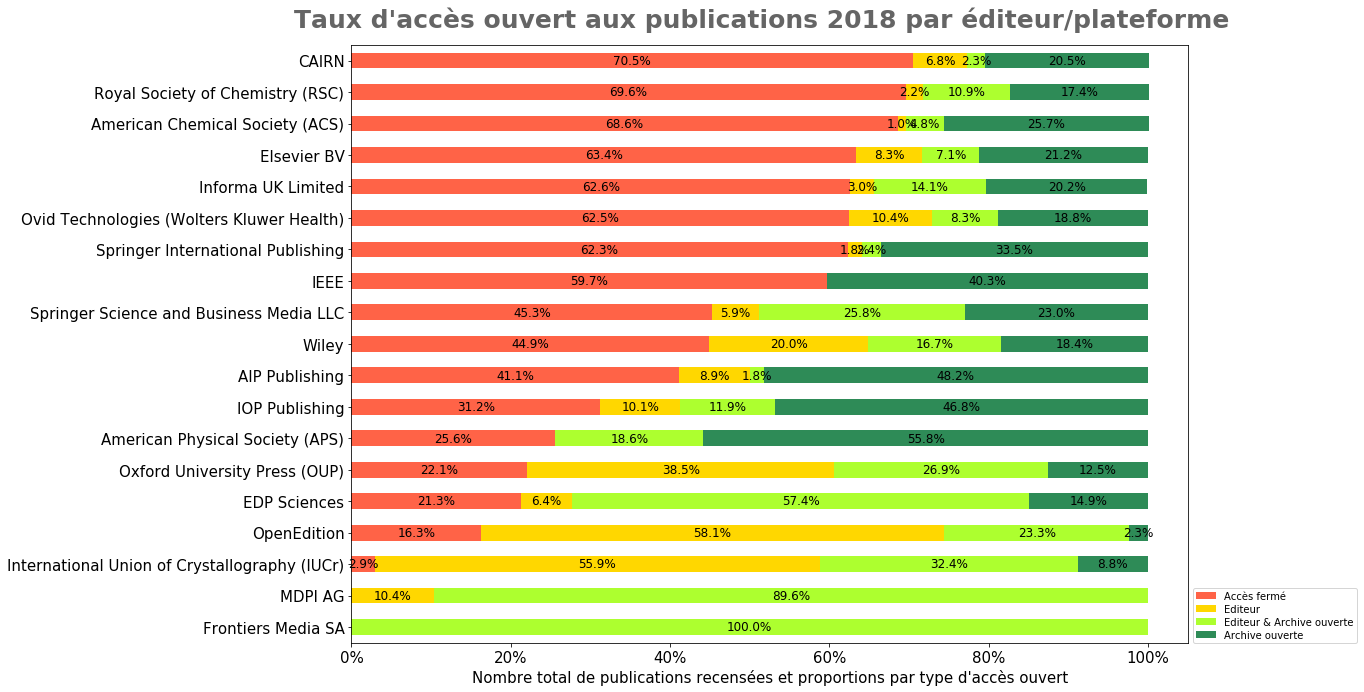

In [29]:
import matplotlib.ticker as mtick

ax = df_oa_editeur.plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','gold','greenyellow','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_editeur.columns:
    for i in df_oa_editeur.index:
        label = str(df_oa_editeur.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=12)
        
plt.gca().invert_yaxis()

plt.tick_params(axis = 'both', labelsize = 15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 15)

plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2018 par éditeur/plateforme", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_editeur.png', dpi=100, bbox_inches='tight', pad_inches=0.9)


### *Répartition des publications 2018 par type de publication et type d'accès (mesuré en 2019)*

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title.**</span>

**Isoler les publications 2018**

In [30]:
publications_2018 = df_complete.loc[df_complete['published_year'] == 2018.0,:]

**Trier les publications par type de publication et par accès, ouvert ou fermé**

In [31]:
df_oa_by_type = pd.crosstab([publications_2018['is_oa']],publications_2018['genre'])
df_oa_by_type = df_oa_by_type.rename({'False': 'Accès fermé', 'True' : "Accès ouvert"})
df_oa_by_type

genre  book  book-chapter  component  journal-article  journal-issue  \
is_oa                                                                  
False     2           129          3             1569              0   
True      0            66          0             1799              2   

genre  monograph  posted-content  proceedings-article  
is_oa                                                  
False          0               0                  102  
True           3              14                  118

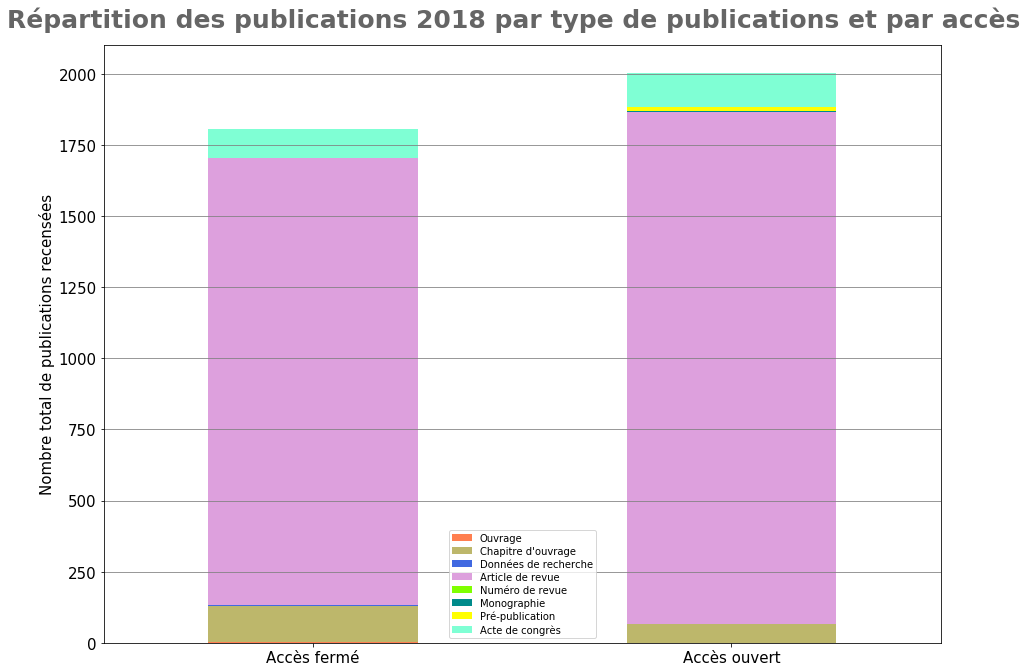

In [32]:
ax = df_oa_by_type.plot(kind="bar", stacked=True, figsize=(15, 11), rot=0, color = ['coral', 'darkkhaki', 'royalblue',
                                                                                    'plum', 'chartreuse', 'darkcyan',
                                                                                    'yellow', 'aquamarine'])
ax.set_xticklabels(('Accès fermé', 'Accès ouvert'))

plt.xlabel(None)  
plt.ylabel("Nombre total de publications recensées", fontsize=15)

axes = plt.gca()

plt.gca().yaxis.grid(True, which = 'both', color = 'gray', zorder = 0)
plt.tick_params(axis = 'both', labelsize = 15)

plt.legend(["Ouvrage", "Chapitre d'ouvrage", "Données de recherche", "Article de revue", "Numéro de revue", "Monographie"
           , "Pré-publication", "Acte de congrès"],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3)


plt.title("Répartition des publications 2018 par type de publications et par accès", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_type.png', dpi=100, bbox_inches='tight', pad_inches=0.9)